In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('aqua_data.xlsx',header=0)

In [3]:
df

,Date,Total effluent volume,Average effluent flow rate,Average pH,Average Temperature,Average TOC (some measures per month),COD single value,BTEX single value,NO3 single value,PO4 single value,SO4 calc value,H2O2
0,2015-01-01,6274.436688,8.433383,2.473274,19.491709,288,2100.0,0.02,1298.0,0.78,630.310040,0.2
1,2015-02-01,6536.414160,9.726807,2.290511,18.344463,208,1800.0,< 0.01,748.0,0.52,527.710033,0.4
2,2015-03-01,8573.405380,11.523394,2.290511,20.783849,217,3100.0,0.02,827.0,0.90,458.045461,0.3
3,2015-04-01,9013.163461,12.518283,2.290511,23.517036,200,2300.0,0.01,711.0,0.97,407.200757,<0.1
4,2015-05-01,7161.491611,9.625661,2.290511,27.368973,164,6950.0,0.01,974.0,3.94,551.822709,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-01,3762.150270,5.056654,2.290511,28.712239,90,NaN,<0.01,NaN,NaN,386.606373,NaN
68,2020-09-01,6249.347203,8.679649,2.290511,28.134658,192,1300.0,0.02,985.0,0.82,538.909765,<0.1
69,2020-10-01,7514.517235,10.100158,2.290511,23.455715,223,NaN,0.01,NaN,NaN,495.010513,NaN
70,2020-11-01,6638.278655,9.219831,2.290511,21.418823,231,NaN,<0.01,NaN,NaN,519.911846,NaN


## Preprocess Dataset 

In [4]:
def preprocess(df):
    df=df.drop(columns={'Date'})
    df['BTEX single value']=np.where((df['BTEX single value']=='<0.01')|(df['BTEX single value']=='< 0.01'),'0',df['BTEX single value'])
    
    df['H2O2']=np.where((df['H2O2']=='<0.1'),'0',df['H2O2'])
    df=df.astype(float).round(2)
    
    
    pdf=df.fillna(df.mean())
    pdf=pdf.astype(float).round(2)
    return pdf

In [5]:
pdf=preprocess(df)

In [6]:
pdf

,Total effluent volume,Average effluent flow rate,Average pH,Average Temperature,Average TOC (some measures per month),COD single value,BTEX single value,NO3 single value,PO4 single value,SO4 calc value,H2O2
0,6274.44,8.43,2.47,19.49,288.0,2100.00,0.02,1298.00,0.78,630.31,0.20
1,6536.41,9.73,2.29,18.34,208.0,1800.00,0.00,748.00,0.52,527.71,0.40
2,8573.41,11.52,2.29,20.78,217.0,3100.00,0.02,827.00,0.90,458.05,0.30
3,9013.16,12.52,2.29,23.52,200.0,2300.00,0.01,711.00,0.97,407.20,0.00
4,7161.49,9.63,2.29,27.37,164.0,6950.00,0.01,974.00,3.94,551.82,0.20
...,...,...,...,...,...,...,...,...,...,...,...
67,3762.15,5.06,2.29,28.71,90.0,1765.94,0.00,915.67,2.14,386.61,0.13
68,6249.35,8.68,2.29,28.13,192.0,1300.00,0.02,985.00,0.82,538.91,0.00
69,7514.52,10.10,2.29,23.46,223.0,1765.94,0.01,915.67,2.14,495.01,0.13
70,6638.28,9.22,2.29,21.42,231.0,1765.94,0.00,915.67,2.14,519.91,0.13


## FILTER METHOD USING PEARSON CORRELATION

### A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
### A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
### Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related. 

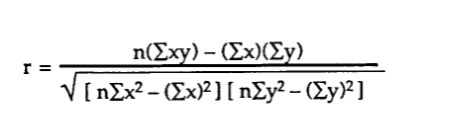

## Using a Heatmap to display the correlation. 

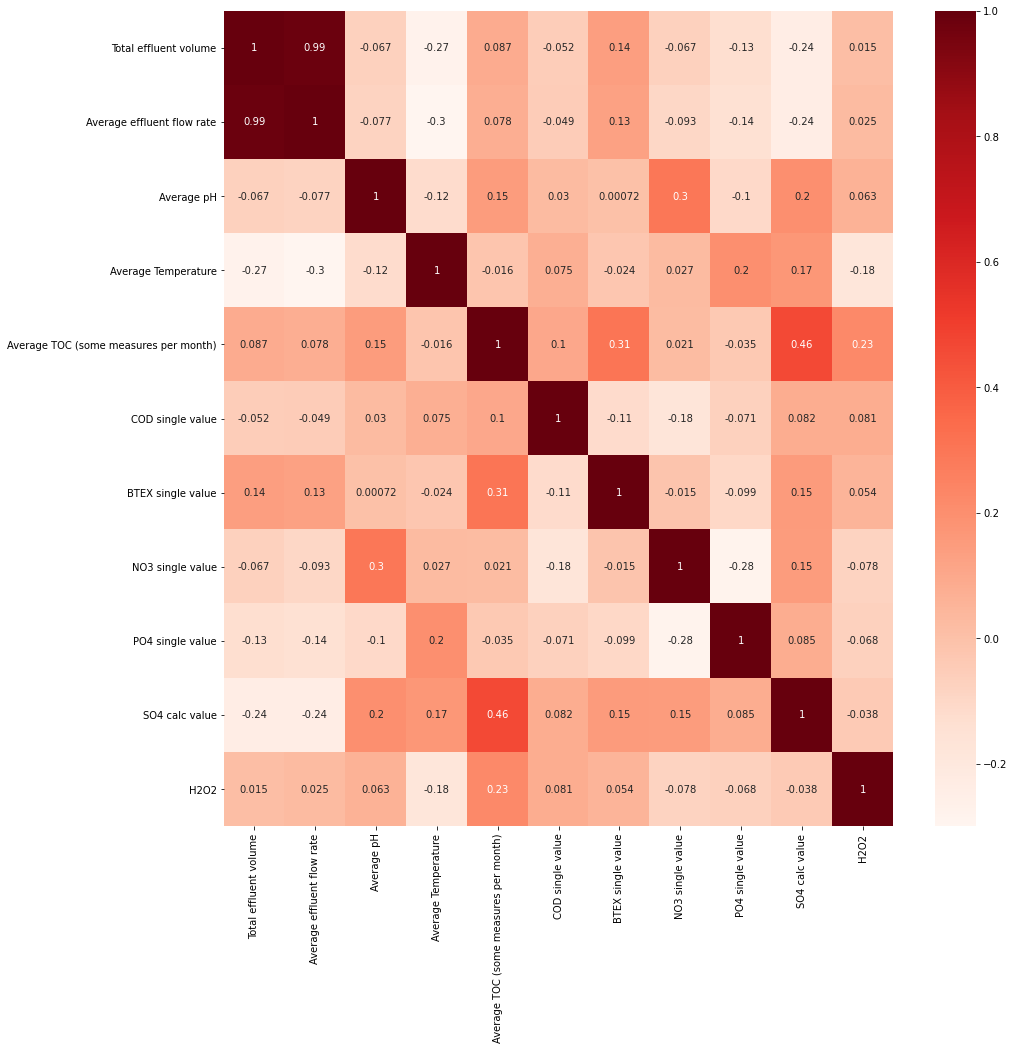

In [138]:
plt.figure(figsize=(15,15))
corr = pdf.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

plt.savefig("pearson_corr.png")
plt.show()

## P-VALUES CALCULATION

## When you perform a statistical test a p-value helps you determine the significance of your results in relation to the null hypothesis. Or in our case that the correlation of the features, calculated by the Pearsons correlation formula are not due to random causes meaning that there is  no relationship between two measured phenomena. The smaller the p-value the stronger  the evidence against the null hypothesis.

### For H2O2

In [124]:
from scipy import stats
corr_pval=pd.DataFrame(columns=['r','p'])# r is pearson's correlation 
df2=pdf
for col in df2:
    
    r, p=stats.pearsonr(df2['H2O2'],df2[col])
    corr_pval.loc[col]=[round(r,3),round(p,3)]
corr_pval

,r,p
Total effluent volume,0.015,0.902
Average effluent flow rate,0.025,0.833
Average pH,0.063,0.599
Average Temperature,-0.181,0.128
Average TOC (some measures per month),0.227,0.055
COD single value,0.081,0.497
BTEX single value,0.054,0.652
NO3 single value,-0.078,0.516
PO4 single value,-0.068,0.568
SO4 calc value,-0.038,0.751


### For NO3 single value

In [125]:
from scipy import stats
corr_pval=pd.DataFrame(columns=['r','p'])# r is pearson's correlation 
df2=pdf
for col in df2:
    
    r, p=stats.pearsonr(df2['NO3 single value'],df2[col])
    corr_pval.loc[col]=[round(r,3),round(p,3)]
corr_pval

,r,p
Total effluent volume,-0.067,0.574
Average effluent flow rate,-0.093,0.439
Average pH,0.296,0.012
Average Temperature,0.027,0.820
Average TOC (some measures per month),0.021,0.864
COD single value,-0.176,0.139
BTEX single value,-0.015,0.898
NO3 single value,1.000,0.000
PO4 single value,-0.282,0.016
SO4 calc value,0.150,0.209


#                                   FEATURE SELECTION WITH MUTUAL INFORMATION


###  In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (Entropy) obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.




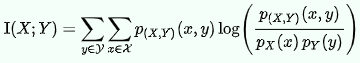

In [126]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [127]:
X=pdf.drop(columns={'H2O2','NO3 single value'})
y=pdf['H2O2']
z=pdf['NO3 single value']

## MI Calculation for H2O2 in comparison with the rest of the features.

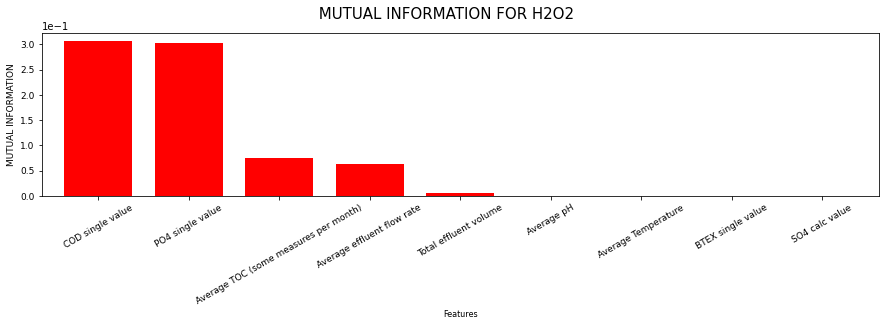

In [128]:
xtr,xtest,ytr,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

mi=mutual_info_regression(xtr,ytr)
mi=pd.Series(mi)
mi.index=xtr.columns
mi.sort_values(ascending=False,inplace=True)




mi.plot.bar(colormap='hsv', figsize=(15,3), fontsize=9, width=0.75, legend=False, rot=30,)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' MUTUAL INFORMATION FOR H2O2 ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=8)
plt.ylabel(r'MUTUAL INFORMATION', fontsize=9)
plt.show()

## MI Calculation for NO3 single value in comparison with the rest of the features 

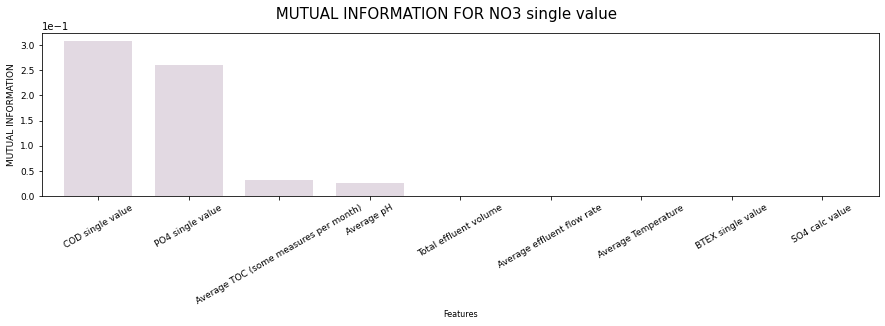

In [129]:
xtr,xtest,ztr,ztest=train_test_split(X,z,test_size=0.2,random_state=0)
mi=mutual_info_regression(xtr,ztr)
mi=pd.Series(mi)
mi.index=xtr.columns
mi.sort_values(ascending=False,inplace=True)
mi.plot.bar(cmap='twilight', figsize=(15,3), fontsize=9, width=0.75, legend=False, rot=30)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' MUTUAL INFORMATION FOR NO3 single value ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=8)
plt.ylabel(r'MUTUAL INFORMATION', fontsize=9)
plt.show()

## Finding k=5 most important features using Select K best function and Mutual Information formula. 

In [99]:
from sklearn.feature_selection import SelectKBest

### In comparison with H2O2

In [136]:
kbest=SelectKBest(mutual_info_regression,k=5).fit(xtr,ytr)
dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','MI Score']
featureScores=featureScores.sort_values(by=['MI Score'],ascending=False)
featureScores

,Features,MI Score
5,COD single value,0.322509
7,PO4 single value,0.309547
1,Average effluent flow rate,0.063762
0,Total effluent volume,0.024111
4,Average TOC (some measures per month),0.017483
2,Average pH,0.000000
3,Average Temperature,0.000000
6,BTEX single value,0.000000
8,SO4 calc value,0.000000


### In comparison with NO3 single value.

In [137]:
kbest=SelectKBest(mutual_info_regression,k=5).fit(xtr,ztr)
dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','MI Score']
featureScores=featureScores.sort_values(by=['MI Score'],ascending=False)
featureScores

,Features,MI Score
5,COD single value,0.367805
7,PO4 single value,0.244484
0,Total effluent volume,0.000000
1,Average effluent flow rate,0.000000
2,Average pH,0.000000
3,Average Temperature,0.000000
4,Average TOC (some measures per month),0.000000
6,BTEX single value,0.000000
8,SO4 calc value,0.000000
